## Problem Statement

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.



### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading dataset.

In [2]:
df = pd.read_csv('cubic_Zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


We have to delete 'Unnamed: 0' column as it is the index number and keeping it won't make any sence.

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [5]:
df.shape

(26967, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


The types of datatypes for individual columns is correct

In [7]:
##Let's see the stats of our columns.
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [8]:
## Let's see stats for both categorical and numerical columns.
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


## Data cleaning.

In [9]:
## Droping unwanted column.
df = df.drop('Unnamed: 0',axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
##checking for null values.
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

We can see here that our depth column has 697 null values

In [12]:
## let's check mean and median of depthfillnaumn.
print('Mean for depth:', df['depth'].mean())
print('Median for depth:', df['depth'].median())

Mean for depth: 61.74514655500572
Median for depth: 61.8


There is no significant difference between mean and median. Choosing mean to fill missing values would be a good idea.

In [13]:
## filling missing values.
df['depth'].fillna(df['depth'].mean(),inplace=True)

In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [15]:
##checking for duplicate values.
df.duplicated().sum()

34

In [16]:
## Let's drop these duplicate values.
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
## checking skewness.
df.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6600\2242281458.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


carat    1.114789
depth   -0.026422
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

In [19]:
## Lets divide our columns into categorical and numeric seperately.
cat = []
num = []
for column in df.columns:
    if df[column].dtype == 'object':
        cat.append(column) 
    else:
        num.append(column)  

print(cat)
print(num)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


## Exploratory data analysis.

**A.) 4 C's of Diamond-** The 4 C's of diamond grading are cut, color, clarity, and carat.Let's see the distribution for each C.

In [20]:
##cut
df['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [21]:
df['cut'].value_counts(normalize=True)

Ideal        0.401181
Premium      0.255671
Very Good    0.223778
Good         0.090410
Fair         0.028961
Name: cut, dtype: float64

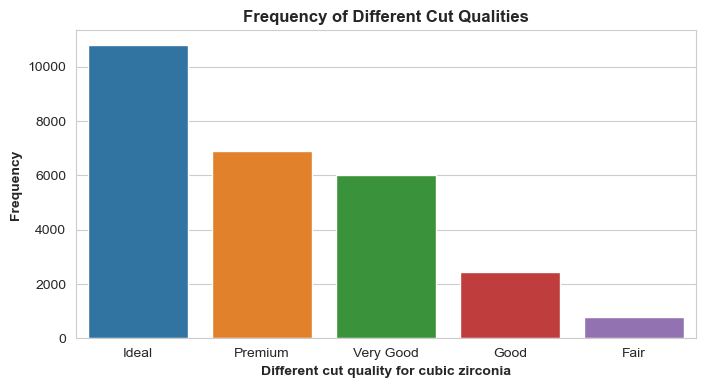

In [22]:
##cut analysis
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')
sns.countplot(data=df, x='cut')  
plt.xlabel('Different cut quality for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different Cut Qualities', weight='bold') 
plt.show()

**Objervation:** we can see that we have most number of ideal cuts nad very few Fair cuts.

In [23]:
## color Analysis
df['color'].value_counts(normalize=True)

G    0.209891
E    0.182527
F    0.175361
H    0.152044
D    0.124049
I    0.102662
J    0.053466
Name: color, dtype: float64

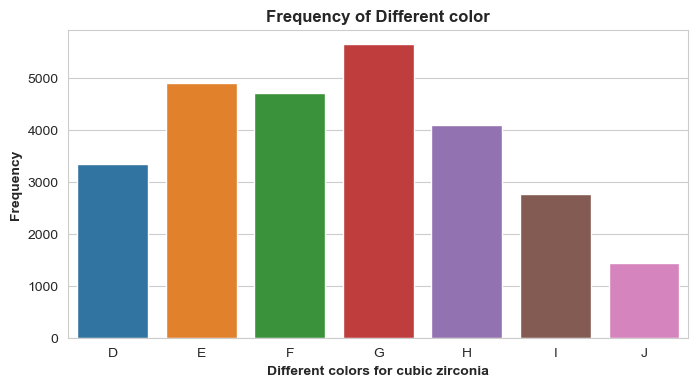

In [24]:
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')

# Define the desired order of x-axis labels
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

sns.countplot(data=df, x='color', order=color_order)  
plt.xlabel('Different colors for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different color', weight='bold') 
plt.show()


**Objervation:** We know that for the color grades of cubic zirconica D being the best and J the worst.
we can certainley say that most of our diamond colors are of decent grade.

In [25]:
##clarity analysis.
df['clarity'].value_counts(normalize=True)

SI1     0.243753
VS2     0.226228
SI2     0.169458
VS1     0.151747
VVS2    0.093937
VVS1    0.068281
IF      0.033082
I1      0.013515
Name: clarity, dtype: float64

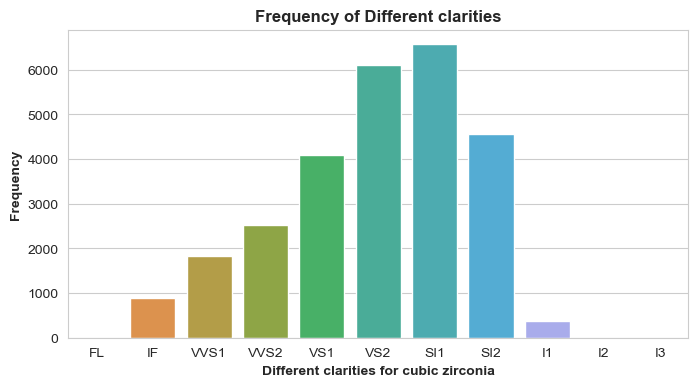

In [26]:
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')

# Define the desired order of x-axis labels
clarity_order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']

sns.countplot(data=df, x='clarity', order=clarity_order)  
plt.xlabel('Different clarities for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different clarities', weight='bold') 
plt.show()


**Objervation:** We know that clarity order from best to worst is FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 with  FL = flawless, I3= level 3 and so on. with this knowledge and the graph we can say that most of our cubic zirconia are not of optimal clarity.

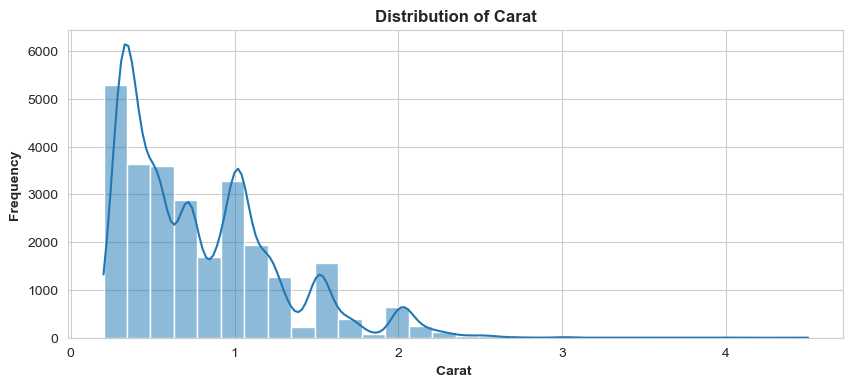

In [27]:
## carat analysis.
plt.figure(figsize=(10, 4))
sns.histplot(df['carat'], bins=30, kde=True)
plt.xlabel('Carat ', weight='bold')
plt.ylabel('Frequency ', weight='bold')
plt.title('Distribution of Carat', weight='bold')
plt.show()

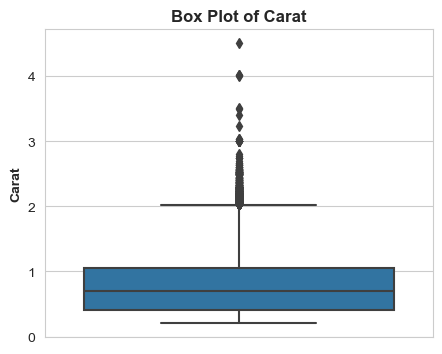

In [28]:
# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='carat')
plt.ylabel('Carat', weight='bold')
plt.title('Box Plot of Carat', weight='bold')
plt.show()

**Observation:** As we know, The price of a diamond increases as the carat weight increases. From the figure we can conclude that most of our cubic zirconia diamonds, almost 75%,are having less than 1 carat.

**B.) Dimensions:**  The dimension of the diamond are depth,table,length,width and height and these dimensions and  can have a significant impact on its appearance and value.Let's check their distributions and find some insights.

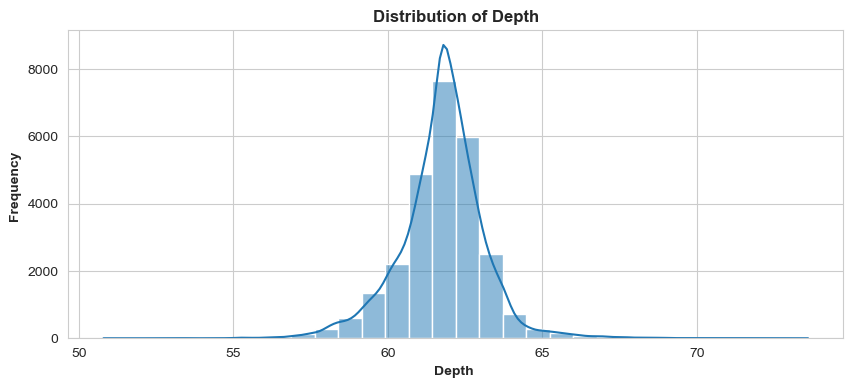

In [29]:
##depth analysis.
plt.figure(figsize=(10, 4))
sns.histplot(df['depth'], bins=30, kde=True)
plt.xlabel('Depth ', weight='bold')
plt.ylabel('Frequency ', weight='bold')
plt.title('Distribution of Depth', weight='bold')
plt.show()

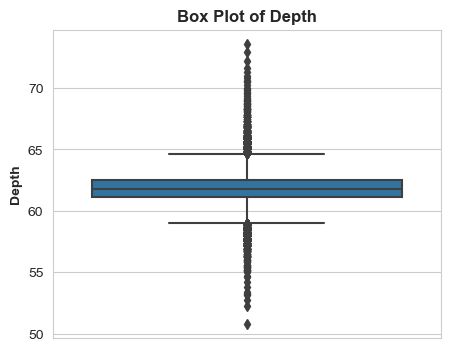

In [30]:
# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='depth')
plt.ylabel('Depth', weight='bold')
plt.title('Box Plot of Depth', weight='bold')
plt.show()

**Observation:** The depth of a diamond can affect its value and brilliance.A depth percentage between 56.5 and 65 percent is considered good.So, we can say that our diamonds are in good range of depth.

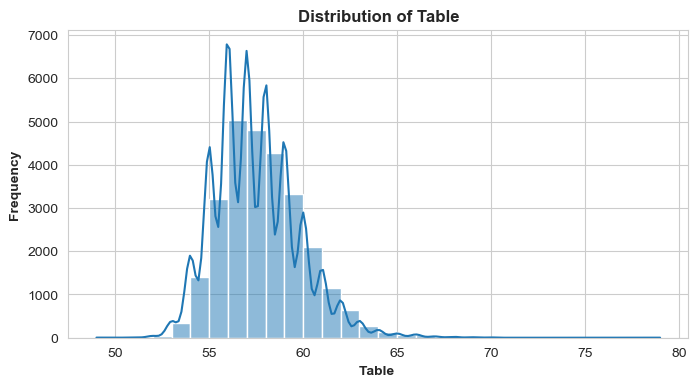

In [31]:
##Table analysis.
plt.figure(figsize=(8, 4))
sns.histplot(df['table'], bins=30, kde=True)
plt.xlabel('Table ', weight='bold')
plt.ylabel('Frequency ', weight='bold')
plt.title('Distribution of Table', weight='bold')
plt.show()

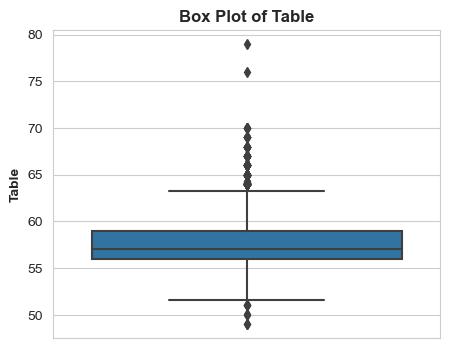

In [32]:
# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='table')
plt.ylabel('Table', weight='bold')
plt.title('Box Plot of Table', weight='bold')
plt.show()

**Observation:** A diamond's table is the largest facet on the stone, and it's located at the top when the stone is face up. The table plays a vital role in the diamond's brilliance and light performance.The top cut grades ranges from 52% to 61% table sizes.Therefore, our table size is optimal.

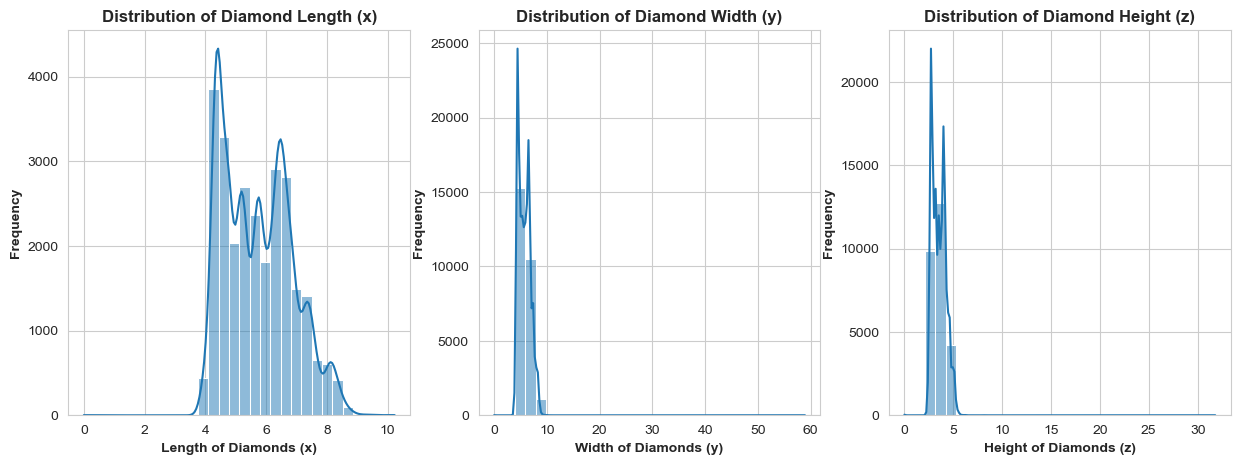

In [33]:
## Length(x),Width(y),Height(z) analysis.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for 'x,' 'y,' and 'z' in the respective subplots
sns.histplot(df['x'], bins=30, kde=True, ax=axes[0])
axes[0].set_xlabel('Length of Diamonds (x)', weight='bold')
axes[0].set_ylabel('Frequency', weight='bold')
axes[0].set_title('Distribution of Diamond Length (x)', weight='bold')

sns.histplot(df['y'], bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel('Width of Diamonds (y)', weight='bold')
axes[1].set_ylabel('Frequency', weight='bold')
axes[1].set_title('Distribution of Diamond Width (y)', weight='bold')

sns.histplot(df['z'], bins=30, kde=True, ax=axes[2])
axes[2].set_xlabel('Height of Diamonds (z)', weight='bold')
axes[2].set_ylabel('Frequency', weight='bold')
axes[2].set_title('Distribution of Diamond Height (z)', weight='bold')


# Show the combined plot
plt.show()

**Observation:** 
- diamonds lenth ranges from 3.9 to 9 mm
- diamonds width ranges from 3 to 10 mm 
- diamonds heights ranges from 3 to 5 mm

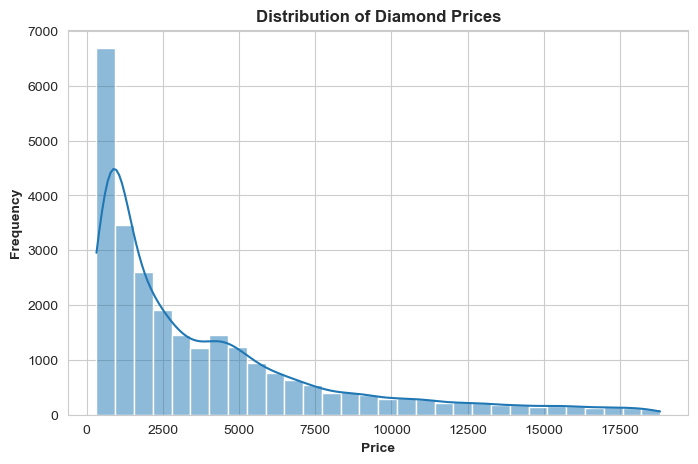

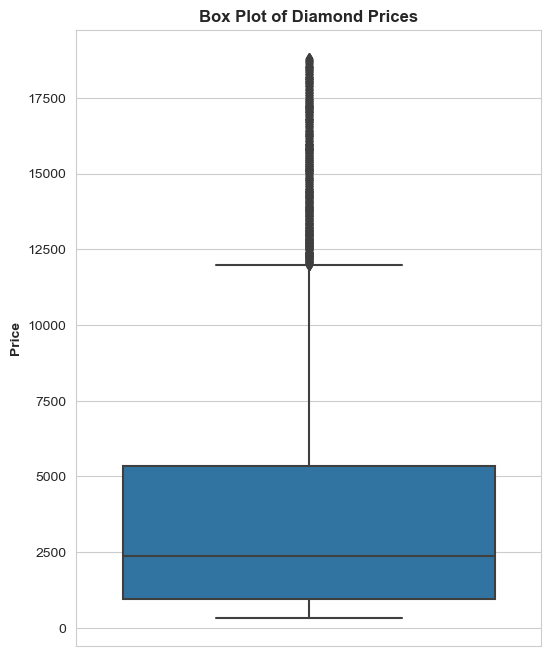

In [34]:
##Price analysis.
# Histogram of 'price'
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Distribution of Diamond Prices', weight='bold')

# Box plot of 'price'
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='price')
plt.ylabel('Price', weight='bold')
plt.title('Box Plot of Diamond Prices', weight='bold')
plt.show()

**Observation:** 75% of diamonds have price below 5000 and some having price as high as 18000.

**C.)** Let's check the effects of Categorical columns on price

Text(0.5, 1.0, 'Box Plot of Price by Cut')

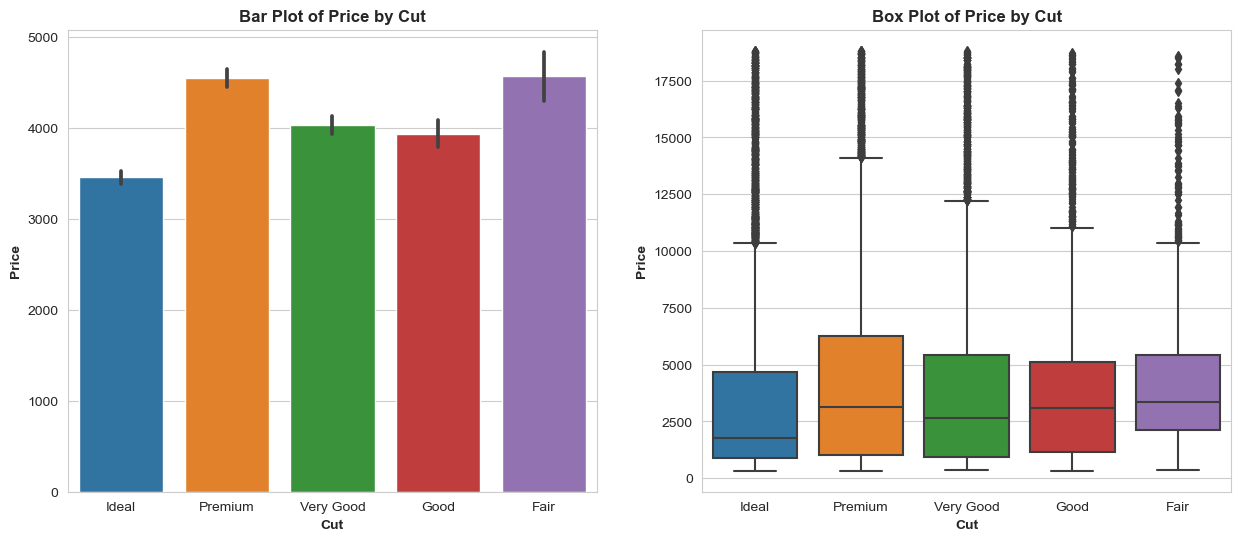

In [35]:
# Analysis of 'price' by 'cut'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of 'price' by 'cut' in the first subplot
sns.barplot(data=df, x='cut', y='price', ax=axes[0])
axes[0].set_xlabel('Cut', weight='bold')
axes[0].set_ylabel('Price', weight='bold')
axes[0].set_title('Bar Plot of Price by Cut', weight='bold')

# Box plot of 'price' by 'cut' in the second subplot
sns.boxplot(data=df, x='cut', y='price', ax=axes[1])
axes[1].set_xlabel('Cut', weight='bold')
axes[1].set_ylabel('Price', weight='bold')
axes[1].set_title('Box Plot of Price by Cut', weight='bold')

**Observation:** On an Average Premium cuts are more costly followed by very good cuts,good, fair and than ideal.

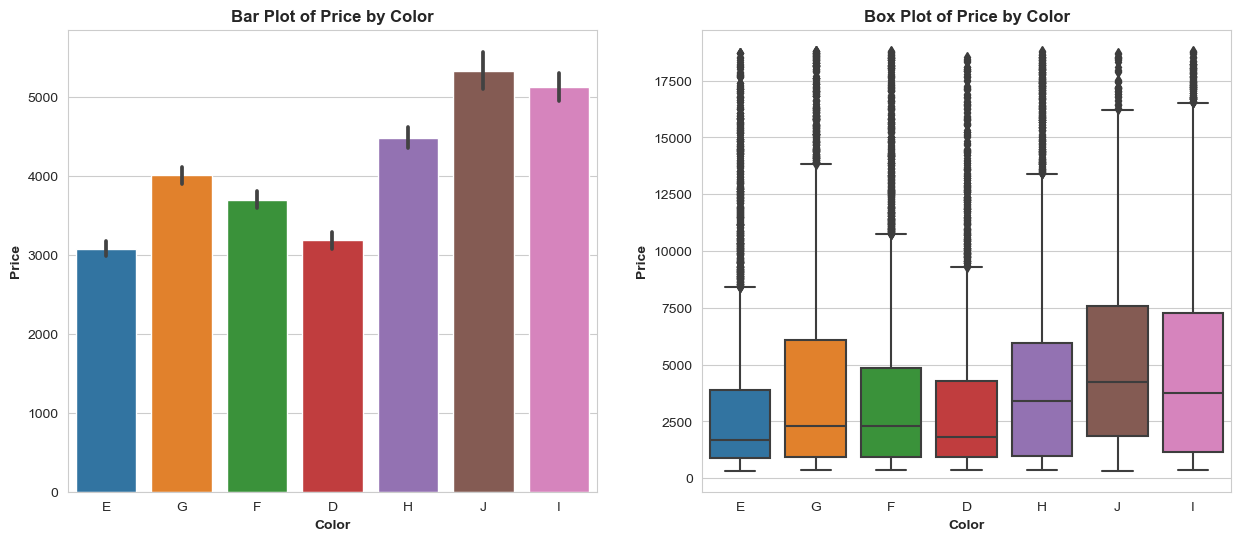

In [36]:
# Analysis  of 'price' by 'cut'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of 'price' by 'color' in the first subplot
sns.barplot(data=df, x='color', y='price', ax=axes[0])
axes[0].set_xlabel('Color', weight='bold')
axes[0].set_ylabel('Price', weight='bold')
axes[0].set_title('Bar Plot of Price by Color', weight='bold')

# Box plot of 'price' by 'color' in the second subplot
sns.boxplot(data=df, x='color', y='price', ax=axes[1])
axes[1].set_xlabel('Color', weight='bold')
axes[1].set_ylabel('Price', weight='bold')
axes[1].set_title('Box Plot of Price by Color', weight='bold')

plt.show()

**Observation:** Average price of j color diamond is highest and E is lowest.

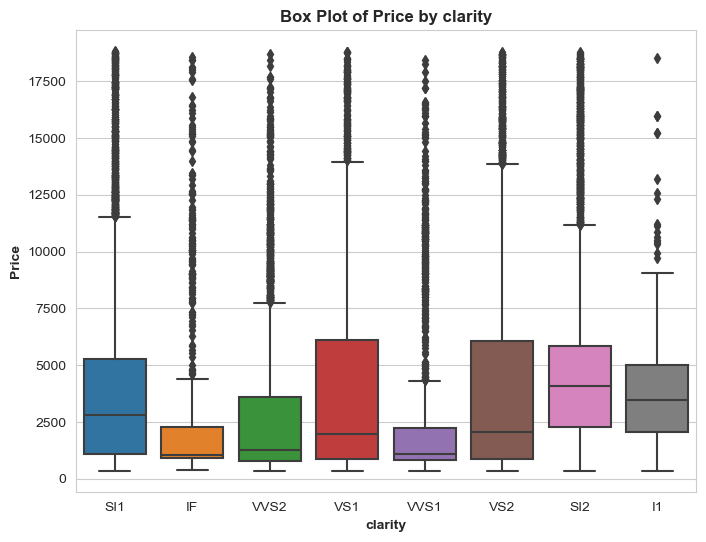

In [38]:
# Analysis of price by clarity.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='clarity', y='price') 
plt.xlabel('clarity', weight='bold')
plt.ylabel('Price', weight='bold')
plt.title('Box Plot of Price by clarity', weight='bold')
plt.show()

**Observation:** Average price of S12 clarity diamond is highest and IF,WS1 is lowest.

In [53]:
## correlation plot for numeric column.
df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6600\2337045205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,x,y,z,price
carat,1.000000,0.034741,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.034741,1.000000,-0.293720,-0.018145,-0.024139,0.097659,-0.002855
table,0.181539,-0.293720,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018145,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024139,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.097659,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002855,0.126844,0.886554,0.856441,0.850682,1.000000


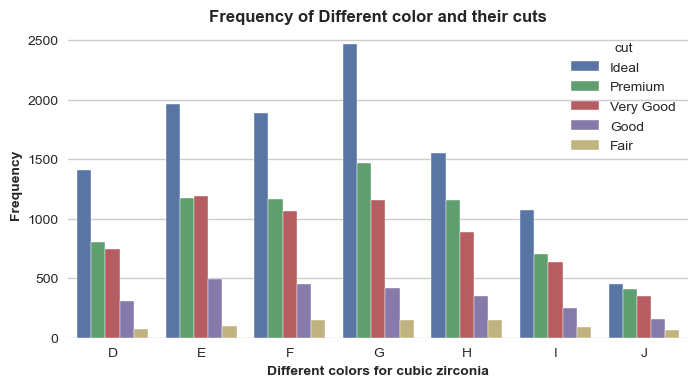

In [57]:
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')

# Define the desired order of x-axis labels
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

sns.countplot(data=df, x='color', hue='cut' ,order=color_order)  
plt.xlabel('Different colors for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different color and their cuts', weight='bold') 
plt.show()


**Observation:**
- Most number of ideal  and premium cut diamonds are obtained from G colored diamonds.  
- Most numbers of Verygood cut diamond are obtained from E colored diamonds.

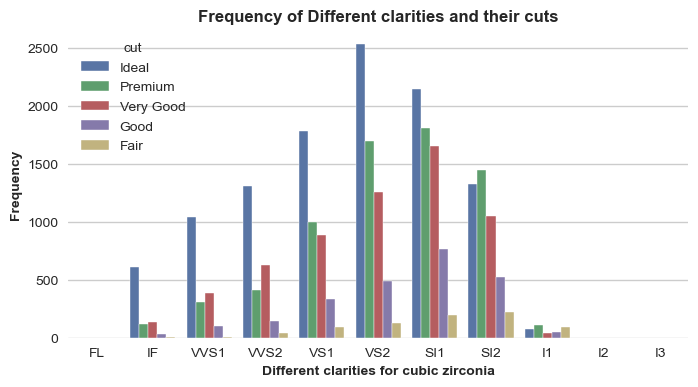

In [59]:
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')

# Define the desired order of x-axis labels
clarity_order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3']

sns.countplot(data=df, x='clarity', hue='cut', order=clarity_order)  
plt.xlabel('Different clarities for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different clarities and their cuts', weight='bold') 
plt.show()


**Observation:**
- Most number of Ideal cut diamonds are obtained from VS2 clarity diamonds.
- Most number of Premium cut and Very Good cut diamonds are obtained from SI1 clarity diamonds.

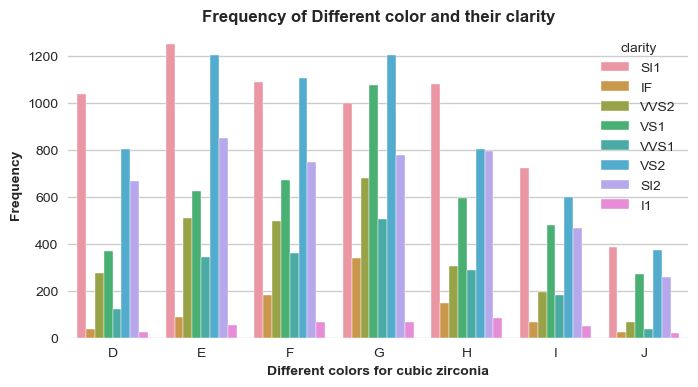

In [62]:
plt.figure(figsize=(8, 4))  
sns.set_style('whitegrid')

# Define the desired order of x-axis labels
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

sns.countplot(data=df, x='color', hue='clarity' ,order=color_order)  
plt.xlabel('Different colors for cubic zirconia', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Frequency of Different color and their clarity', weight='bold') 
plt.show()


In [63]:
##Let's save the cleaned dataset.
df.to_csv('cubic_zirconia_cleaned.csv', index=False)